# titanic dataset 

In [175]:
import pandas as pd

In [176]:
data=pd.read_csv(r"C:\Users\ADMIN\Downloads\Titanic Dataset.csv")

In [177]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [178]:
data.tail(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [179]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [181]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [182]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [208]:
data.groupby(['Age']).count()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,
0.42,1,1,1,1,1,1,1,1,1,0,1
0.67,1,1,1,1,1,1,1,1,1,0,1
0.75,2,2,2,2,2,2,2,2,2,0,2
0.83,2,2,2,2,2,2,2,2,2,0,2
0.92,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
70.00,2,2,2,2,2,2,2,2,2,1,2
70.50,1,1,1,1,1,1,1,1,1,0,1
71.00,2,2,2,2,2,2,2,2,2,1,2


In [209]:
data1=data.drop(['SibSp','PassengerId','Name','Ticket','Cabin','Parch'],axis=1)

In [234]:
#data2=pd.get_dummies(data1)

In [211]:
import seaborn as sns

<Axes: >

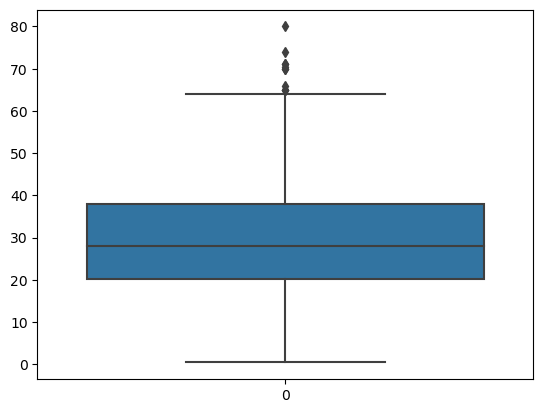

In [212]:
sns.boxplot(data1['Age'])

In [213]:
data1['Age']=data1['Age'].mask(data1['Age']>65,65)

<Axes: >

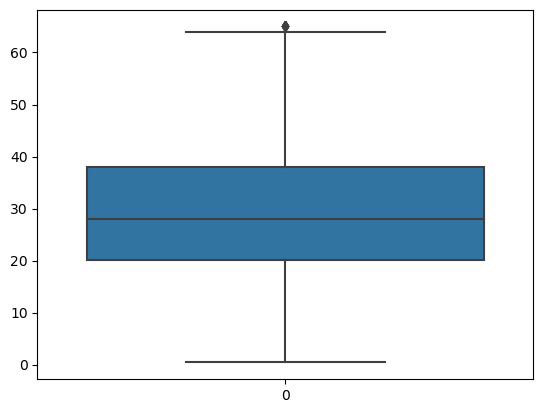

In [214]:
sns.boxplot(data1['Age'])

In [215]:
from sklearn.impute import KNNImputer

In [216]:
imputer=KNNImputer(n_neighbors=3)

In [217]:
data_filled=imputer.fit_transform(data2)

In [218]:
colnames=data2.columns

In [219]:
data1=pd.DataFrame(data=data_filled,columns=colnames)

In [233]:
data1.head(5)

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,38.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1.0,3.0,26.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0.0,3.0,35.0,8.0500,0.0,1.0,0.0,0.0,1.0


In [221]:
data1['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 58.66666667,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 35.66666667,
       31.        , 16.66666667, 34.        , 15.        , 28.        ,
        8.        , 38.5       , 19.        , 40.        , 27.33333333,
       18.        , 66.        , 42.        , 23.66666667, 21.        ,
       32.16666667,  3.        , 25.33333333, 36.        , 18.66666667,
        7.        , 49.        , 29.        , 65.        , 43.        ,
       28.5       ,  5.        , 11.        , 45.        , 33.        ,
       24.33333333, 17.        , 32.        , 16.        , 25.        ,
        0.83      , 30.        , 23.        , 24.        , 46.        ,
       59.        , 71.        , 37.        , 22.66666667, 47.        ,
       14.5       , 70.5       , 32.5       , 12.        , 14.66666667,
        9.        , 36.5       , 51.        , 55.5       , 40.5 

In [235]:
data2=pd.get_dummies(data1)

In [236]:
x=data2.drop(['Survived'],axis=1)

In [237]:
x.head(2)

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3.0,22.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,71.2833,1.0,0.0,1.0,0.0,0.0


In [238]:
y=data2['Survived']

In [239]:
y.head(7)

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
5    0.0
6    0.0
Name: Survived, dtype: float64

In [240]:
from sklearn.model_selection import train_test_split

In [281]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=45)

In [282]:
x_train.shape

(596, 8)

In [283]:
y_test.shape

(295,)

In [284]:
from sklearn.linear_model import LogisticRegression

In [285]:
r=LogisticRegression()

In [286]:
reg=r.fit(x_train,y_train)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [287]:
y_pred=r.predict(x_test)

In [288]:
y_pred

array([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1.

In [289]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8203389830508474